<a href="https://colab.research.google.com/github/Joan-Kamau/dsc-phase-1-project/blob/master/Microsoft_New_Movie_Studio_Analysis_Joan_Kamau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Overview***:

This project seeks to use Exploratory Data Analysis(EDA) to give insights and recommendations to Microsoft Corporation that would like to venture into movie production by creating a new movie studio.     
This analysis targets the movie industry analytics and information that will provide insights and recommendations needed by Microsoft in this new venture.


***Business Problem:***

Microsoft would like to create a new movie studio but they have no experience or necessary information regarding movie production.
We need to gather information that can help Microsoft decide on what type of production they can lean towards. This can be done by looking at the best performing movie genres in terms of rating, the movies with the highest gross earnings and the viability of production.


***Data:***

This project will make use of the following data sets from Box Office Mojo and IMDB to help with findings:


*  **bom.movie_gross**: This dataset contains information regarding both domestic and foreign earnings per movie title

*   **imdb.title.basics**: This contains information regarding the movies including the primary title,original title , start year, runtime minutes and genres.


*   **imdb.title.ratings:**This dataset shows the average ratings for the movies and voter information.



*  **tmdb.movies**: This shows various movies and their popularity, voter information and languages used.
*   **tn.movie_budgets**: This contains information regarding production budgets and the gross amounts thereof of the different movies(Both domestic and worldwide gross)







In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#load datasets

movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
title_ratings = pd.read_csv('imdb.title.ratings.csv.gz')
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
title_basics = pd.read_csv('imdb.title.basics.csv.gz')

In [ ]:
#gathering some information on our Movie gross dataset

movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
#Gathering info on the Title basics dataset

title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
#Gathering some information on our Ratings dataset

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
# Summary of data in the dataset

movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [ ]:
title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [ ]:
movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


***Data Cleaning***

In [ ]:
# Removing null values in the movie_gross dataset

movie_gross.dropna()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [ ]:
# Removing null values om the title ratings dataset

title_ratings.dropna()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [ ]:
title_basics.dropna()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [ ]:
movie_budgets.dropna()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('imdb.title.ratings.csv.gz', sep='\t')

df.head()

,"tconst,""averagerating"",""numvotes"""
0,"tt10356526,""8.3000"",""31"""
1,"tt10384606,""8.9000"",""559"""
2,"tt1042974,""6.4000"",""20"""
3,"tt1043726,""4.2000"",""50352"""
4,"tt1060240,""6.5000"",""21"""


In [ ]:
import pandas as pd

bom = pd.read_csv('bom.movie_gross.csv.gz')

bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
# Loading the datasets ensuring the column to be merged on is present and named correctly
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')

# Check if 'movie' column exists in both DataFrames
print("Columns in movie_gross:", movie_gross.columns)
print("Columns in movie_budgets:", movie_budgets.columns)

Columns in movie_gross: Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Columns in movie_budgets: Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')


In [ ]:
# Merge datasets
movie_gross = movie_gross.rename(columns={'title': 'movie'})


# Merge datasets on the 'movie' column
merged_df = pd.merge(movie_gross, movie_budgets, on='movie')

# Display the merged DataFrame
merged_df.head()

,movie,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"


In [ ]:
# Check for unique values, potential typos, or formatting differences
print(movie_gross['movie'].unique())
print(movie_budgets['movie'].unique())

['Toy Story 3' 'Alice in Wonderland (2010)'
 'Harry Potter and the Deathly Hallows Part 1' ... 'El Pacto' 'The Swan'
 'An Actor Prepares']
['Avatar' 'Pirates of the Caribbean: On Stranger Tides' 'Dark Phoenix' ...
 'Return to the Land of Wonders' 'A Plague So Pleasant'
 'My Date With Drew']


In [ ]:
# Convert to lowercase and remove punctuation
movie_gross['movie'] = movie_gross['movie'].str.lower().str.replace('[^\w\s]', '')
movie_budgets['movie'] = movie_budgets['movie'].str.lower().str.replace('[^\w\s]', '')

In [ ]:
merged_df = pd.merge(movie_gross, movie_budgets, on='movie')

<ipython-input-90-c7fdcb28a8cf>:30: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



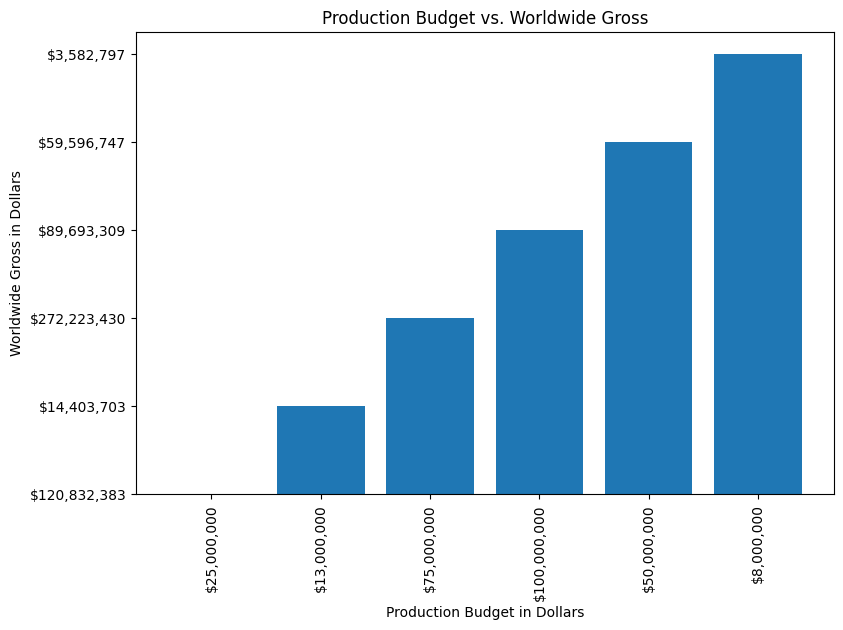

In [ ]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Load the datasets

movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
movie_gross = movie_gross.rename(columns={'title': 'movie'})
merged_df = pd.merge(movie_gross, movie_budgets, on='movie')

df = merged_df.copy()
df.describe()
df.isnull().sum()
df.duplicated()
df.drop_duplicates()
df.head(6)

# Convert 'worldwide_gross' and 'production_budget' to numeric, handling errors
merged_df['worldwide_gross'] = pd.to_numeric(merged_df['worldwide_gross'], errors='coerce')
merged_df['production_budget'] = pd.to_numeric(merged_df['production_budget'], errors='coerce')


#Sample data
sample_df = df.sample(n=6)
df.head()

df.sorted = df.sort_values(by='worldwide_gross', ascending=False)
df.head()

#Bar chart for Production Budget vs Worldwide Gross
plt.figure(figsize=(9, 6))
plt.bar(data = sample_df, x='production_budget', height ='worldwide_gross')
plt.title('Production Budget vs. Worldwide Gross')
plt.yticks()
plt.xticks(rotation = 90)
plt.xlabel('Production Budget in Dollars')
plt.ylabel('Worldwide Gross in Dollars')
plt.show()



In [ ]:
#load movie budgets dataset

movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
# Convert columns to numeric, overwriting the existing columns
movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'], errors='coerce')
movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'], errors='coerce')
movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'], errors='coerce')

# Calculate correlations
correlations = movie_budgets[['production_budget', 'worldwide_gross']].corr()
print(correlations)


                   production_budget  worldwide_gross
production_budget                NaN              NaN
worldwide_gross                  NaN              NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

movie_budgets.info()

df = pd.read_csv('tn.movie_budgets.csv.gz')
df.describe()
df.isnull().sum()
df.duplicated()
df.drop_duplicates()
df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
import plotly.express as px
import pandas as pd

# Load the datasets
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz')

# Rename the column for merging
movie_gross = movie_gross.rename(columns={'title': 'movie'})

# Check for common movies before merging
common_movies = set(movie_gross['movie']).intersection(set(movie_budgets['movie']))
print("Number of common movies:", len(common_movies))

# Merge datasets on the 'movie' column
merged_df = pd.merge(movie_gross, movie_budgets, on='movie')

# Checking shape of the merged DataFrame
print("Shape of merged DataFrame:", merged_df.shape)

# Display the first few rows of the merged DataFrame
print(merged_df.head())

print(merged_df.isnull().sum())

merged_df.describe()
merged_df.isnull().sum()
merged_df.duplicated()
merged_df.drop_duplicates()
merged_df.head(10)

# Convert 'worldwide_gross' and 'production_budget' to numeric, handling errors
merged_df['worldwide_gross'] = pd.to_numeric(merged_df['worldwide_gross'], errors='coerce')
merged_df['production_budget'] = pd.to_numeric(merged_df['production_budget'], errors='coerce')

fig = px.scatter(merged_df,
                 x='production_budget',
                 y='worldwide_gross',
                 text='movie',
                 color='movie',
                 title='Production Budget vs. Worldwide Gross',
                 labels={'production_budget': 'Production Budget in Dollars',
                         'worldwide_gross': 'Worldwide Gross in Dollars'})

fig.show()

Number of common movies: 1238
Shape of merged DataFrame: (1247, 10)
                        movie studio  domestic_gross_x foreign_gross  year  \
0                 Toy Story 3     BV       415000000.0     652000000  2010   
1                   Inception     WB       292600000.0     535700000  2010   
2         Shrek Forever After   P/DW       238700000.0     513900000  2010   
3  The Twilight Saga: Eclipse   Sum.       300500000.0     398000000  2010   
4                  Iron Man 2   Par.       312400000.0     311500000  2010   

   id  release_date production_budget domestic_gross_y worldwide_gross  
0  47  Jun 18, 2010      $200,000,000     $415,004,880  $1,068,879,522  
1  38  Jul 16, 2010      $160,000,000     $292,576,195    $835,524,642  
2  27  May 21, 2010      $165,000,000     $238,736,787    $756,244,673  
3  53  Jun 30, 2010       $68,000,000     $300,531,751    $706,102,828  
4  15   May 7, 2010      $170,000,000     $312,433,331    $621,156,389  
movie                  0


In [ ]:
merged_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              0 non-null      object 
 1   studio             0 non-null      object 
 2   domestic_gross_x   0 non-null      float64
 3   foreign_gross      0 non-null      object 
 4   year               0 non-null      int64  
 5   id                 0 non-null      int64  
 6   release_date       0 non-null      object 
 7   production_budget  0 non-null      float64
 8   domestic_gross_y   0 non-null      object 
 9   worldwide_gross    0 non-null      float64
dtypes: float64(3), int64(2), object(5)
memory usage: 0.0+ bytes


In [ ]:
title_ratings.info()
df = pd.read_csv('imdb.title.ratings.csv.gz')
df.describe()
df.isnull().sum()
df.duplicated()
df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   tconst,"averagerating","numvotes"  73856 non-null  object
dtypes: object(1)
memory usage: 577.1+ KB


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [ ]:
# Sort by rating in descending order
top_rated_movies = df.sort_values(by='averagerating', ascending=False)

# Select the top 10 movies
top_10_movies = top_rated_movies.head()

df_sorted = df.sort_values(by=['averagerating', 'numvotes'], ascending=[False, False])
top_movies = df_sorted.head()
print(top_movies)

          tconst  averagerating  numvotes
65033  tt9715646           10.0        20
34334  tt4960818           10.0         8
49073  tt5089804           10.0         7
52178  tt7259300           10.0         6
57679  tt5344358           10.0         6


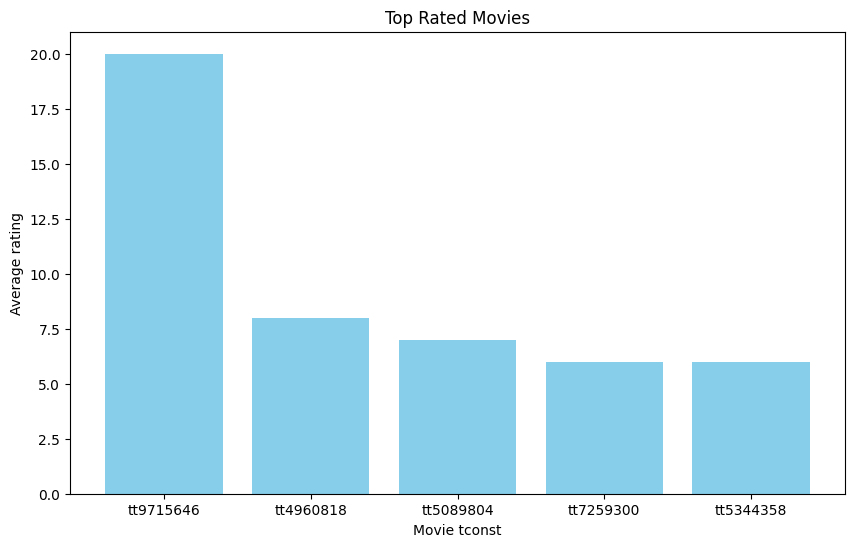

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_movies['tconst'], top_movies['numvotes'], color= 'skyblue')
plt.xlabel('Movie tconst')
plt.ylabel('Average rating')
plt.title('Top Rated Movies')
plt.show()

The graph above shows the top rated movies by voters and each movie is identified by a unique identifier- **tconst**. An analysis has been done on the best rated through use of average rating and number of votes(numvotes).
Microsoft can lean towards production of the top rated movies to increase the possibility of viewership.


In [ ]:
correlations = top_movies[['averagerating', 'numvotes']].corr()
print(correlations)

               averagerating  numvotes
averagerating            NaN       NaN
numvotes                 NaN       1.0


In [ ]:
#Loading the tmdb_movies dataset

tmdb_movies = pd.read_csv('tmdb.movies.csv.gz')
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
#Cleaning the tmdb_movies dataset

tmdb_movies.info()
df = pd.read_csv('tmdb.movies.csv.gz')
df.describe()
df.isnull().sum()
df.duplicated()
df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [ ]:
# Sort dataset to find the movies with most popularity.

df_sorted = df.sort_values(by=['popularity'], ascending=[False])
popular_movies = df_sorted.head()
print(popular_movies)

       Unnamed: 0              genre_ids      id original_language  \
23811       23811           [12, 28, 14]  299536                en   
11019       11019               [28, 53]  245891                en   
23812       23812  [28, 12, 16, 878, 35]  324857                en   
11020       11020           [28, 12, 14]  122917                en   
5179         5179          [878, 28, 12]   24428                en   

                                  original_title  popularity release_date  \
23811                     Avengers: Infinity War      80.773   2018-04-27   
11019                                  John Wick      78.123   2014-10-24   
23812          Spider-Man: Into the Spider-Verse      60.534   2018-12-14   
11020  The Hobbit: The Battle of the Five Armies      53.783   2014-12-17   
5179                                The Avengers      50.289   2012-05-04   

                                           title  vote_average  vote_count  
23811                     Avengers: Inf

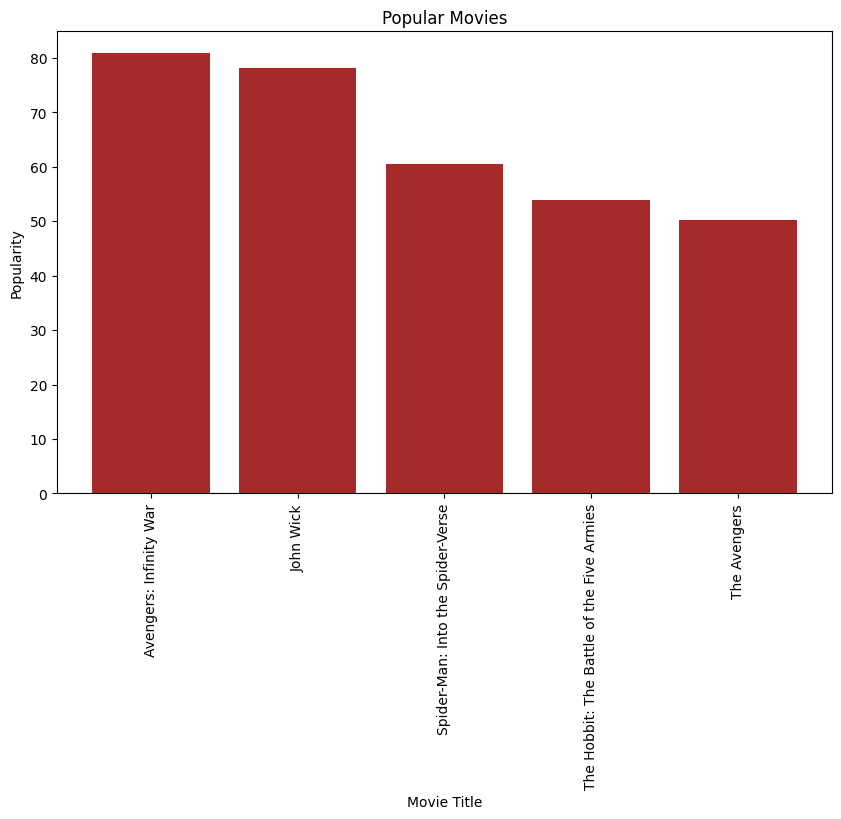

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(popular_movies['original_title'], popular_movies['popularity'], color= 'brown')
plt.xticks(rotation = 'vertical')
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.title('Popular Movies')
plt.show()


The graph above shows the findings of the analysis in regards to movie popularity rated. A higher popularity enhances higher viewership numbers. Microsoft should look into these numbers.





